# Data Reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [3]:
def perform_pca(df: pd.DataFrame):
    '''Perform PCA and plot the result.'''
    numeric_df = df.select_dtypes(include='number')
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    plt.title('PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


In [6]:
def perform_ica(df: pd.DataFrame):
    '''Perform ICA and plot the result.'''
    numeric_df = df.select_dtypes(include='number')
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    ica = FastICA(n_components=2, random_state=42)
    ica_result = ica.fit_transform(scaled_data)

    plt.figure(figsize=(10, 6))
    plt.scatter(ica_result[:, 0], ica_result[:, 1])
    plt.title('ICA Result')
    plt.xlabel('Independent Component 1')
    plt.ylabel('Independent Component 2')
    plt.show()


In [7]:
def perform_lda(df: pd.DataFrame, target_col: str):
    '''Perform LDA and plot the result.'''
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in DataFrame.")
    
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Encode categorical target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    X = X.fillna(0)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lda = LinearDiscriminantAnalysis(n_components=2)
    lda_result = lda.fit_transform(X_scaled, y_encoded)

    plt.figure(figsize=(10, 6))
    plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y_encoded, cmap='viridis')
    plt.title('LDA Result')
    plt.xlabel('LDA Dimension 1')
    plt.ylabel('LDA Dimension 2')
    plt.colorbar(label='Class')
    plt.show()


### Test


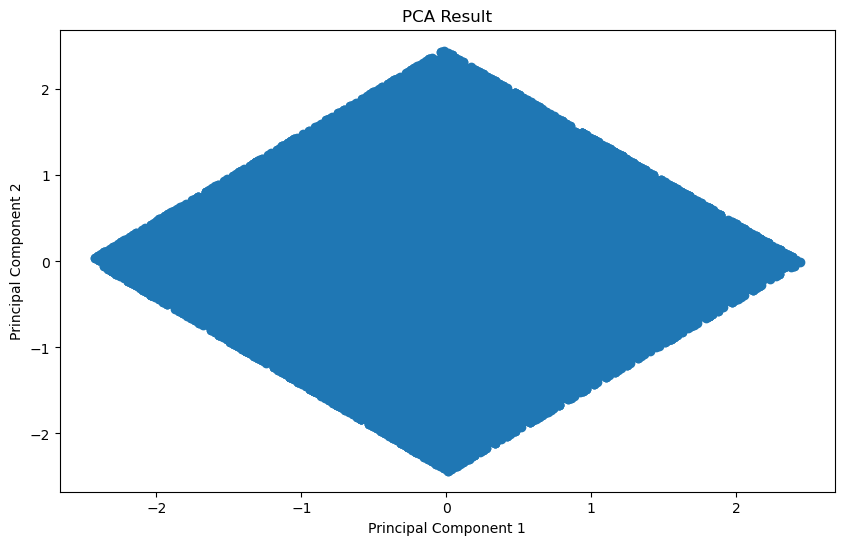

In [4]:
df = pd.read_csv("dataset/movies.csv")
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

perform_pca(df)
